# Bayesian Linear Regression

https://en.wikipedia.org/wiki/Bayesian_linear_regression

Bayesian linear regression is an approach to 
1. Linear regression
2. Based on Bayesian inference

    a) A Priori distribution function (Normal distribution or binomial)
    
    b) Maximum likelihood 
    
    c) A Posteriori result

# Scikit-Learn: Bayesian Linear Regression

https://scikit-learn.org/stable/modules/linear_model.html
    
Bayesian regression techniques can be used to include regularization parameters in the estimation procedure: the regularization parameter is not set in a hard sense but tuned to the data at hand.

This can be done by introducing uninformative priors over the hyper parameters of the model. 

The $l_{2}$ regularization used in Ridge regression and classification is equivalent to finding a maximum a posteriori estimation under a Gaussian prior over the coefficients $ w $ with precision $ \lambda^{-1} $. Instead of setting lambda manually, it is possible to treat it as a random variable to be estimated from the data.

To obtain a fully probabilistic model, the output  is assumed to be Gaussian distributed around $X_{w}$:
    
$$ p(y|X,w,\alpha) = \mathcal{N}(y|X w,\alpha)$$

where $\alpha $ is again treated as a random variable that is to be estimated from the data. 
p in continue probability and N is discrete probability.

The advantages of Bayesian Regression are:

- It adapts to the data at hand.
- It can be used to include regularization parameters in the estimation procedure.

The disadvantages of Bayesian regression include:
- Inference of the model can be time consuming.

# Bayesian Ridge Regression

BayesianRidge estimates a probabilistic model of the regression problem as described above. The prior for the coefficient $w$ is given by a spherical Gaussian:

The priors over $ \alpha $ and $ \lambda $ are chosen to be gamma distributions, the conjugate prior for the precision of the Gaussian. 

The resulting model is called Bayesian Ridge Regression, and is similar to the classical Ridge.

There are four more hyperparameters, $\alpha_{1}$, $\alpha_{2}$, $ \lambda_{1}$, and $ \lambda_{2} $
 of the gamma prior distributions over  $\alpha$ and $ \lambda$. 

These are usually chosen to be non-informative. 

By default $\alpha_{1}$ = $\alpha_{2}$ = $\lambda_{1}$ = $\lambda_{2}$ = $10 ^{-6}$.

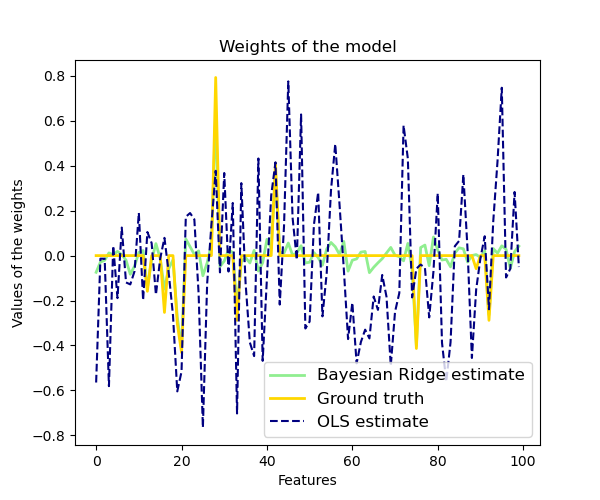

## Bayesian Ridge Regression is used for regression:
https://scikit-learn.org/stable/modules/linear_model.html#bayesian-regression

In [55]:
from sklearn import linear_model
X = [[0., 0.], [1., 1.], [2., 2.], [3., 3.]]
Y = [0., 1., 2., 3.]
reg = linear_model.BayesianRidge()
print('reg.fit(X, Y):')
print(reg.fit(X, Y))
print()
#BayesianRidge()
print('reg.predict([[1, 0.]]):')
print(reg.predict([[1, 0.]]))
print()
#array([0.50000013])
print('reg.coef_:')
print(reg.coef_)
#array([0.49999993, 0.49999993])

reg.fit(X, Y):
BayesianRidge()

reg.predict([[1, 0.]]):
[0.50000013]

reg.coef_:
[0.49999993 0.49999993]


# Example of Bayesian Ridge Regression

https://scikit-learn.org/stable/auto_examples/linear_model/plot_bayesian_ridge.html

Computes a Bayesian Ridge Regression on a synthetic dataset.

See Bayesian Ridge Regression for more information on the regressor.

Compared to the OLS (ordinary least squares) estimator, the coefficient weights are slightly shifted toward zeros, which stabilises them.

As the prior on the weights is a Gaussian prior, the histogram of the estimated weights is Gaussian.

The estimation of the model is done by iteratively maximizing the marginal log-likelihood of the observations.

We also plot predictions and uncertainties for Bayesian Ridge Regression for one dimensional regression using polynomial feature expansion. Note the uncertainty starts going up on the right side of the plot. This is because these test samples are outside of the range of the training samples.

Automatically created module for IPython interactive environment


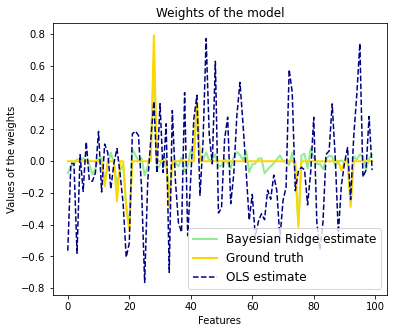

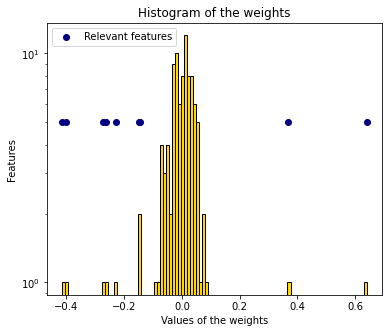

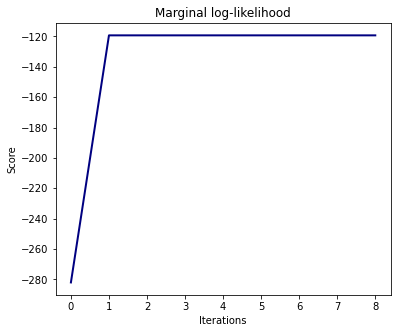

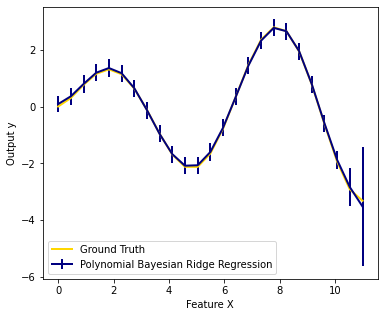

In [54]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.linear_model import BayesianRidge, LinearRegression

# #############################################################################
# Generating simulated data with Gaussian weights
np.random.seed(0)
n_samples, n_features = 100, 100
X = np.random.randn(n_samples, n_features)  # Create Gaussian data
# Create weights with a precision lambda_ of 4.
lambda_ = 4.
w = np.zeros(n_features)
# Only keep 10 weights of interest
relevant_features = np.random.randint(0, n_features, 10)
for i in relevant_features:
    w[i] = stats.norm.rvs(loc=0, scale=1. / np.sqrt(lambda_))
# Create noise with a precision alpha of 50.
alpha_ = 50.
noise = stats.norm.rvs(loc=0, scale=1. / np.sqrt(alpha_), size=n_samples)
# Create the target
y = np.dot(X, w) + noise

# #############################################################################
# Fit the Bayesian Ridge Regression and an OLS for comparison
clf = BayesianRidge(compute_score=True)
clf.fit(X, y)

ols = LinearRegression()
ols.fit(X, y)

# #############################################################################
# Plot true weights, estimated weights, histogram of the weights, and
# predictions with standard deviations
lw = 2
plt.figure(figsize=(6, 5))
plt.title("Weights of the model")
plt.plot(clf.coef_, color='lightgreen', linewidth=lw,
         label="Bayesian Ridge estimate")
plt.plot(w, color='gold', linewidth=lw, label="Ground truth")
plt.plot(ols.coef_, color='navy', linestyle='--', label="OLS estimate")
plt.xlabel("Features")
plt.ylabel("Values of the weights")
plt.legend(loc="best", prop=dict(size=12))

plt.figure(figsize=(6, 5))
plt.title("Histogram of the weights")
plt.hist(clf.coef_, bins=n_features, color='gold', log=True,
         edgecolor='black')
plt.scatter(clf.coef_[relevant_features], np.full(len(relevant_features), 5.),
            color='navy', label="Relevant features")
plt.ylabel("Features")
plt.xlabel("Values of the weights")
plt.legend(loc="upper left")

plt.figure(figsize=(6, 5))
plt.title("Marginal log-likelihood")
plt.plot(clf.scores_, color='navy', linewidth=lw)
plt.ylabel("Score")
plt.xlabel("Iterations")


# Plotting some predictions for polynomial regression
def f(x, noise_amount):
    y = np.sqrt(x) * np.sin(x)
    noise = np.random.normal(0, 1, len(x))
    return y + noise_amount * noise


degree = 10
X = np.linspace(0, 10, 100)
y = f(X, noise_amount=0.1)
clf_poly = BayesianRidge()
clf_poly.fit(np.vander(X, degree), y)

X_plot = np.linspace(0, 11, 25)
y_plot = f(X_plot, noise_amount=0)
y_mean, y_std = clf_poly.predict(np.vander(X_plot, degree), return_std=True)
plt.figure(figsize=(6, 5))
plt.errorbar(X_plot, y_mean, y_std, color='navy',
             label="Polynomial Bayesian Ridge Regression", linewidth=lw)
plt.plot(X_plot, y_plot, color='gold', linewidth=lw,
         label="Ground Truth")
plt.ylabel("Output y")
plt.xlabel("Feature X")
plt.legend(loc="lower left")
plt.show()